# **Lab5.1 : CNN Feature maps**

In [168]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms


## Get VGG16 Pretrained model
Explore the VGG16 achitecture.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace=True)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace=True)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace=True)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace=True)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace=True)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace=True)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)
```

</details>


In [169]:
### START CODE HERE ###
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()

### END CODE HERE ###

/Users/maikittitee/Documents/KMITL/1-2024/ImageProcess/repo/env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/maikittitee/Documents/KMITL/1-2024/ImageProcess/repo/env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Explore all layers in feature extractor part.
[Read more.](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.named_modules:~:text=named_modules(memo%3DNone%2C%20prefix%3D%27%27%2C%20remove_duplicate%3DTrue))


<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
-------------------
0:Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
1:ReLU(inplace=True)
-------------------
2:Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
3:ReLU(inplace=True)
-------------------
4:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
...
28:Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
29:ReLU(inplace=True)
-------------------
30:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
```

</details>


In [170]:
### START CODE HERE ###
for i, feature in enumerate(vgg16.features):
    print(f"-------------------")
    print(f"{i}:{feature}")

### END CODE HERE ###    

-------------------
0:Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
1:ReLU(inplace=True)
-------------------
2:Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
3:ReLU(inplace=True)
-------------------
4:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
-------------------
5:Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
6:ReLU(inplace=True)
-------------------
7:Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
8:ReLU(inplace=True)
-------------------
9:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
-------------------
10:Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
11:ReLU(inplace=True)
-------------------
12:Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
13:ReLU(inplace=True)
-------------------
14

Examine weight and bias of first Convolution layer and ReLU layer. [Read more.](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html)
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
torch.Size([64, 3, 3, 3])
Kernel : 0
*************************************
Channel : 0
[[-0.5537306   0.1427047   0.5289615 ]
 [-0.58312404  0.35655147  0.76566225]
 [-0.69022113 -0.04801885  0.48409155]]
Min coefficients -0.69022113
-------------------------------------
Channel : 1
[[ 0.17548391  0.00986297 -0.08141315]
 [ 0.04408892 -0.07032251 -0.26035076]
 [ 0.13239175 -0.1727862  -0.1322633 ]]
Min coefficients -0.26035076
-------------------------------------
Channel : 2
[[ 0.31302562 -0.1659134  -0.42752257]
 [ 0.47518674 -0.08267727 -0.48699915]
 [ 0.63202524  0.01930757 -0.2775303 ]]
Min coefficients -0.48699915
-------------------------------------


Kernel : 1
*************************************
Channel : 0
[[ 0.23253721  0.12665984  0.1860546 ]
 [-0.42805314 -0.24348575  0.24628444]
 [-0.2506616   0.14177004 -0.0054864 ]]
Min coefficients -0.42805314
-------------------------------------
Channel : 1
[[-0.14076217 -0.21902554  0.15040672]
 [-0.84126675 -0.3517562   0.5639763 ]
 [-0.24194452  0.5192758   0.5391499 ]]
Min coefficients -0.84126675
-------------------------------------
Channel : 2
[[-0.31432396 -0.37047786 -0.13093661]
 [-0.47144184 -0.15503426  0.3458899 ]
 [ 0.05438393  0.5868277   0.49579924]]
Min coefficients -0.47144184
-------------------------------------

...
```

</details>

In [171]:
### START CODE HERE ###
first_conv = vgg16.features[0]
print(first_conv.weight.size())
# print(first_later
weights = first_conv.weight
      
for kernel_index in range(weights.size(0)):  # loop 64 node
    print(f"\nKernel : {kernel_index}")
    print("*****************************************")
    
    # Iterate over each input channel in the kernel
    for channel_index in range(weights.size(1)):  # loop each channel (RGB)
        channel_weights = weights[kernel_index][channel_index]
        print(f"Channel : {channel_index}")
        print(channel_weights)
        print("Min coefficients", channel_weights.min().item())
        print("----------------------------------------")
      
first_relu = vgg16.features[1]
### END CODE HERE ###

torch.Size([64, 3, 3, 3])

Kernel : 0
*****************************************
Channel : 0
tensor([[-0.5537,  0.1427,  0.5290],
        [-0.5831,  0.3566,  0.7657],
        [-0.6902, -0.0480,  0.4841]], grad_fn=<SelectBackward0>)
Min coefficients -0.6902211308479309
----------------------------------------
Channel : 1
tensor([[ 0.1755,  0.0099, -0.0814],
        [ 0.0441, -0.0703, -0.2604],
        [ 0.1324, -0.1728, -0.1323]], grad_fn=<SelectBackward0>)
Min coefficients -0.26035076379776
----------------------------------------
Channel : 2
tensor([[ 0.3130, -0.1659, -0.4275],
        [ 0.4752, -0.0827, -0.4870],
        [ 0.6320,  0.0193, -0.2775]], grad_fn=<SelectBackward0>)
Min coefficients -0.48699915409088135
----------------------------------------

Kernel : 1
*****************************************
Channel : 0
tensor([[ 0.2325,  0.1267,  0.1861],
        [-0.4281, -0.2435,  0.2463],
        [-0.2507,  0.1418, -0.0055]], grad_fn=<SelectBackward0>)
Min coefficients -0.428053140

In [172]:
assert isinstance(first_conv, nn.Conv2d), "First layer should be a convolutional layer"
assert isinstance(first_relu, nn.ReLU), "Second layer should be a ReLU activation"
assert first_conv.weight.shape == (64, 3, 3, 3), "First layer weight shape should be (64, 3, 3, 3)"

Examine Biases
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Bias : Parameter containing:
tensor([ 0.4034,  0.3778,  0.4644, -0.3228,  0.3940, -0.3953,  0.3951, -0.5496,
         ...
         0.2300,  0.4979,  0.5553,  0.5230, -0.2182,  0.0117, -0.5516,  0.2108],
       requires_grad=True)
```

</details>

In [174]:
### START CODE HERE ###
bias = first_conv.bias
print("Bias :", bias)
### END CODE HERE ###

Bias : Parameter containing:
tensor([ 0.4034,  0.3778,  0.4644, -0.3228,  0.3940, -0.3953,  0.3951, -0.5496,
         0.2693, -0.7602, -0.3508,  0.2334, -1.3239, -0.1694,  0.3938, -0.1026,
         0.0460, -0.6995,  0.1549,  0.5628,  0.3011,  0.3425,  0.1073,  0.4651,
         0.1295,  0.0788, -0.0492, -0.5638,  0.1465, -0.3890, -0.0715,  0.0649,
         0.2768,  0.3279,  0.5682, -1.2640, -0.8368, -0.9485,  0.1358,  0.2727,
         0.1841, -0.5325,  0.3507, -0.0827, -1.0248, -0.6912, -0.7711,  0.2612,
         0.4033, -0.4802, -0.3066,  0.5807, -1.3325,  0.4844, -0.8160,  0.2386,
         0.2300,  0.4979,  0.5553,  0.5230, -0.2182,  0.0117, -0.5516,  0.2108],
       requires_grad=True)


## Process the feature maps
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical



</details>

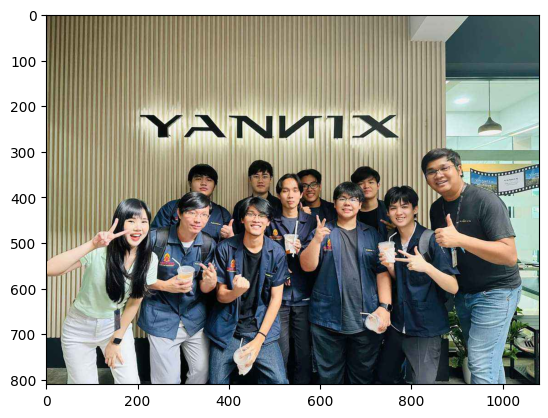

In [175]:
### START CODE HERE ###

image = cv2.imread("yannix.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### END CODE HERE ###

Normalize the image using the mean and standard deviation values from the [VGG16 normalization parameters.](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html)
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

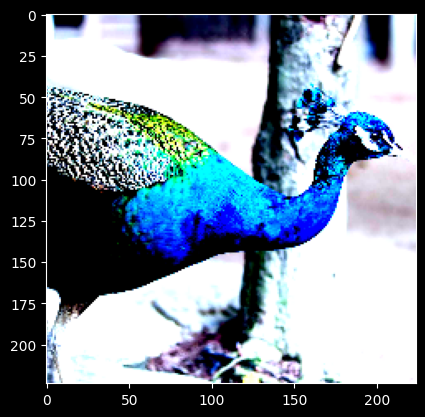

</details>

In [177]:
### START CODE HERE ###


mean = np.array([np.mean(image[:, :, 0]) ,np.mean(image[:, :, 1]), np.mean(image[:, :, 2])])
std = np.array([np.std(image[:, :, 0]) ,np.std(image[:, :, 1]), np.std(image[:, :, 2])])

print(mean)
print(std)

normalized_image = (image - mean) / std
plt.imshow(normalized_image)

### END CODE HERE ###

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.872776285873201..2.2900615844328183].


[125.55328189 126.28232396 114.71932556]
[74.39484093 68.19493933 61.25628909]


Convert the [NumPy image to a PyTorch tensor](https://pytorch.org/docs/stable/torch.html#:~:text=memory%2Dmapped%20file.-,from_numpy,-Creates%20a%20Tensor), ensuring it has the [correct dimensions and data type](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html) for input to the first convolution layer.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.872776285873201..2.2900615844328183].


(810, 1080, 3)
torch.Size([810, 1080, 3])
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


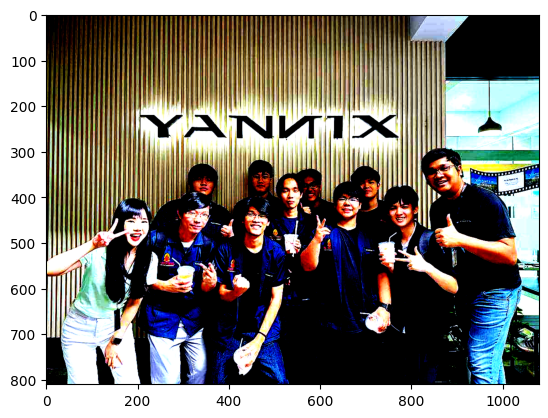

In [178]:
### START CODE HERE ###

tensor = torch.from_numpy(normalized_image)
print(normalized_image.shape)
print(tensor.shape)

plt.imshow(tensor)
print(first_conv)
# print(normalized_imag)

### END CODE HERE ###

Complete the function below. <br>
The plot_featuremap function takes a set of feature maps and creates a grid of subplots, each displaying a single feature map. 

In [183]:
### START CODE HERE ###
def plot_featuremap(img,title, layer):
	if isinstance(layer, nn.Conv2d):
		num_feature_maps = layer.out_channels

	elif isinstance(layer, nn.ReLU):
		num_feature_maps = img.size(0)

	size = int(num_feature_maps ** 0.5)
	if size * size < num_feature_maps:
		size += 1
	print(f"number of feature is {num_feature_maps}")
	output = layer(img)
	output = output.squeeze(0).detach().numpy()
	fig, axes = plt.subplots(size, size, figsize=(15, 15))
	fig.suptitle(title, fontsize=16)

	axes = axes.flatten()

	for i in range(num_feature_maps):
		if i < len(axes):
			# axes[i].imshow(output[i, :, :], cmap='viridis')
			axes[i].imshow(output[i, :, :], cmap='gray')
			axes[i].axis('off')

	for i in range(num_feature_maps, len(axes)):
		axes[i].axis('off')

	plt.show()
	return (output)
  
	
	
### END CODE HERE ###

Pass the image to the first convolutional layer and display the feature map output using your `plot_featuremap()` function.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

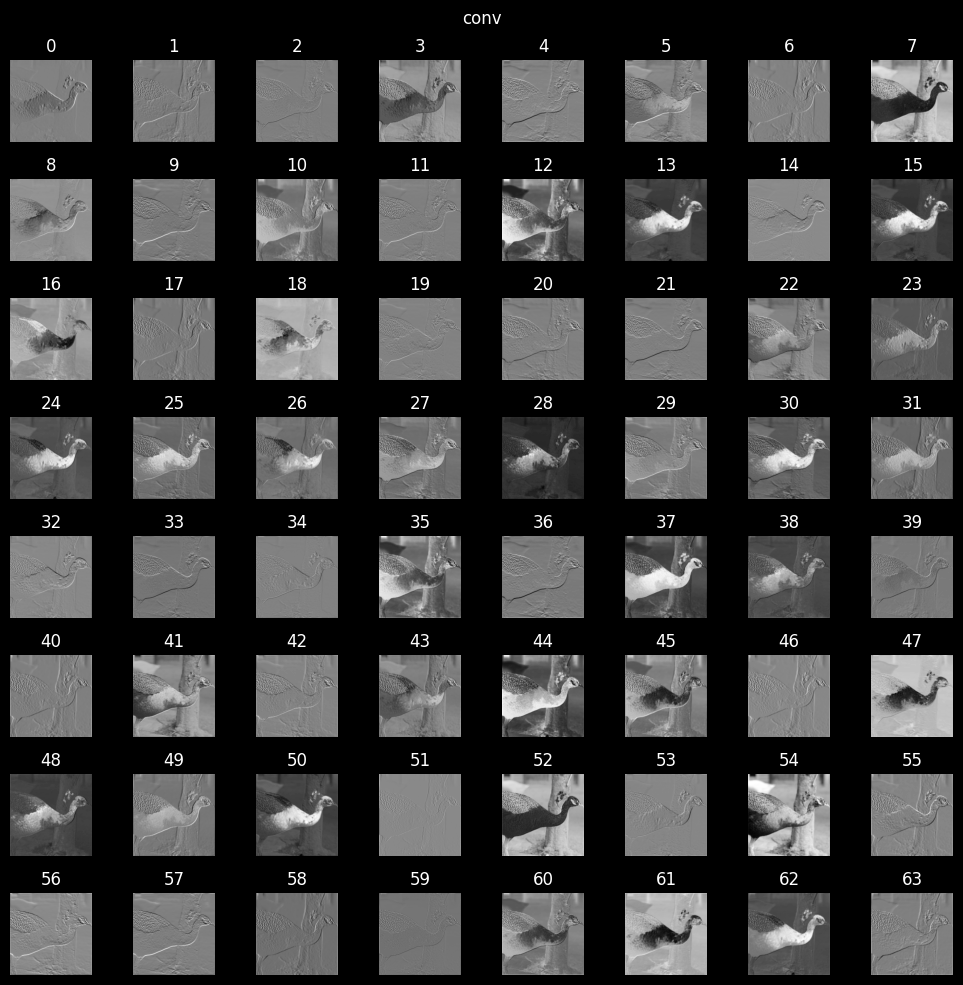
</details>

In [185]:
### START CODE HERE ###

image = torch.tensor(normalized_image).float() / 255.0
image = image.permute(2, 0, 1).unsqueeze(0)


output = plot_featuremap(image, "first conv", first_conv)
output = torch.tensor(output).float()
### END CODE HERE ###

number of feature is 64


Pass the image to the first ReLU layer and display the feature map output using your `plot_featuremap()` function.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

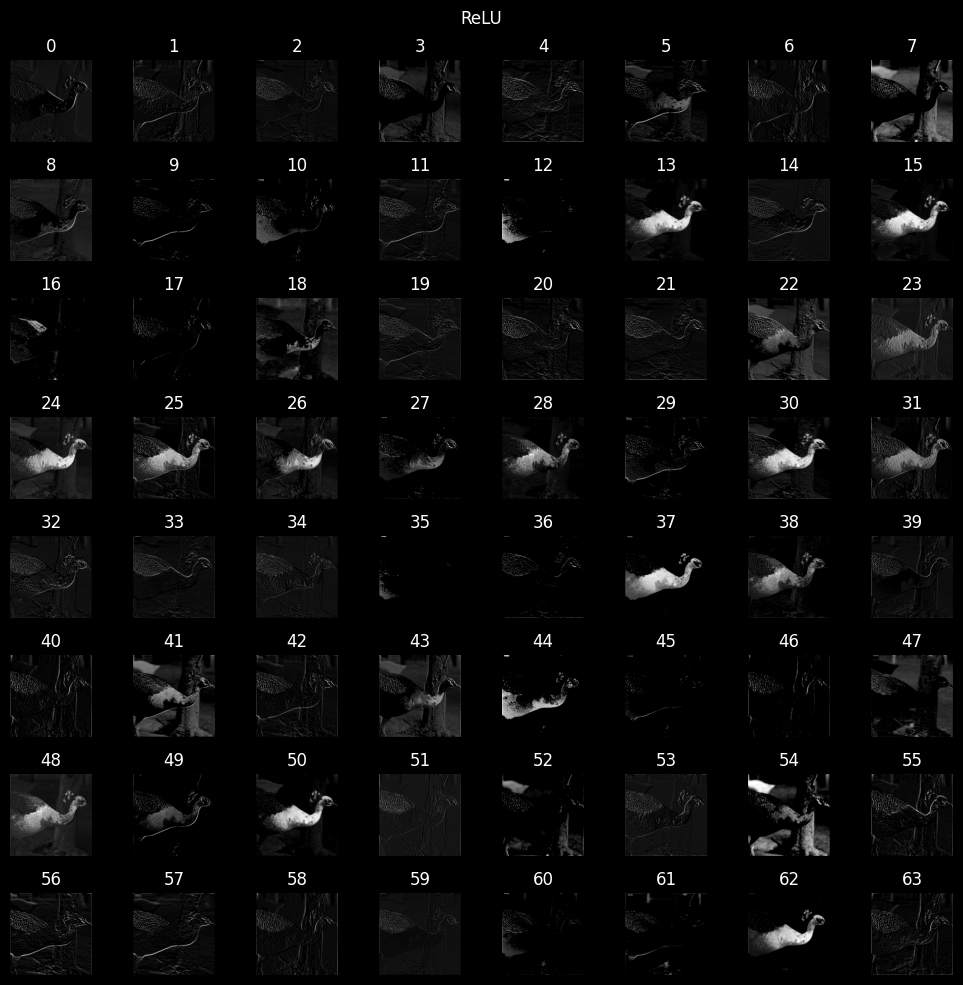

</details>

In [186]:
### START CODE HERE ###
output = plot_featuremap(output, "relu", first_relu)
### END CODE HERE ###

number of feature is 64


## Convolution 2D from scratch
Complete the function below

In [153]:
### START CODE HERE ###
import numpy as np

def convolution2d(img, kernel, padding, stride):
	pass
	return (output)

### END CODE HERE ###

Copy the weights and biases from `vgg16` and then use each kernel perform a 2D convolution using `convolution2d` and display the resulting feature map
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

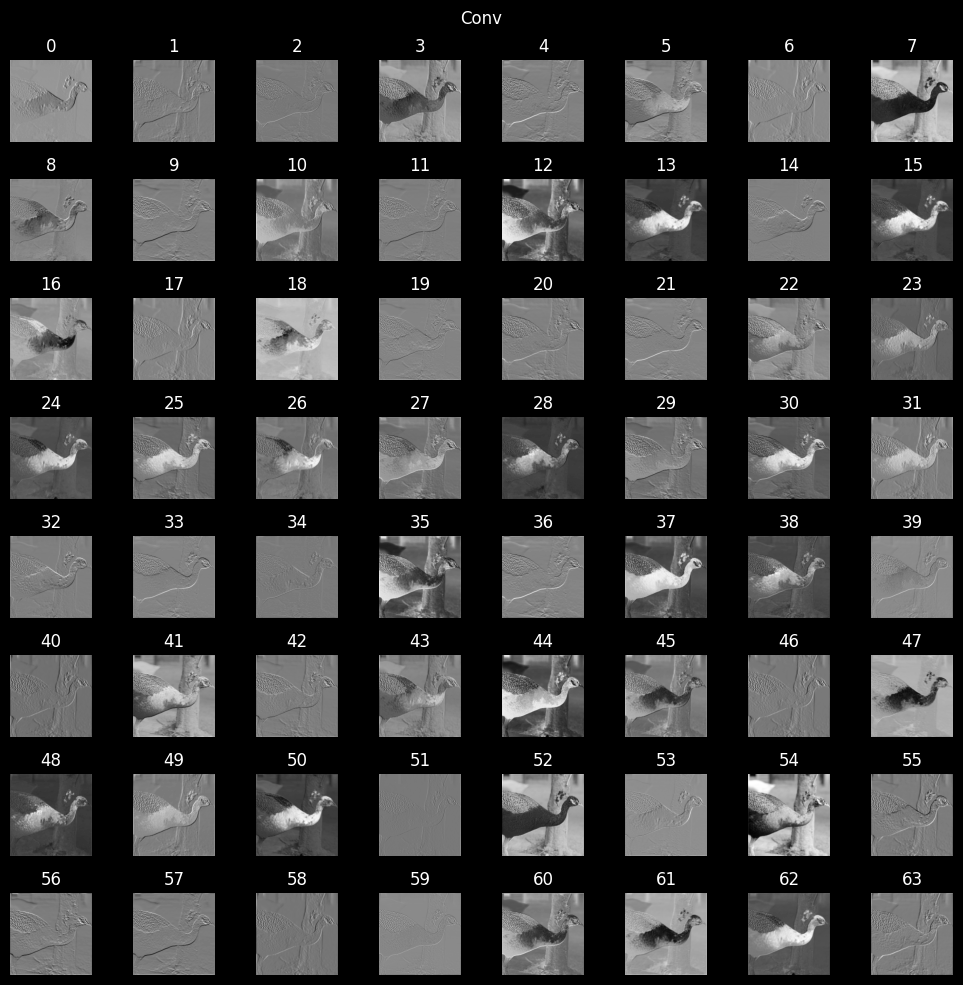

</details>

In [167]:
### START CODE HERE ###

### END CODE HERE ###

After performing the `convolution2d` operation, apply the ReLU activation function to the output. Then, display the resulting feature map.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

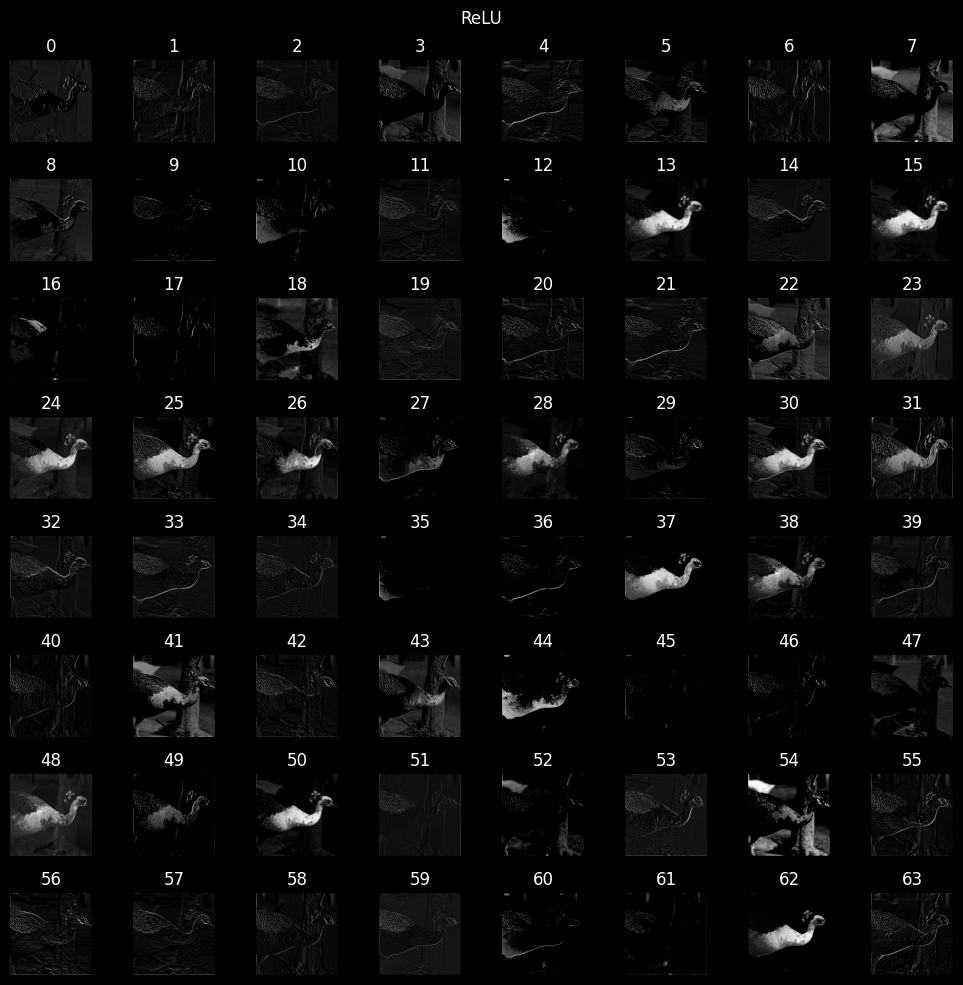

</details>

In [ ]:
### START CODE HERE ###



### END CODE HERE ###

---

# Question
1. Show the array of kernel weights used for extracting object color 
and those used for extracting object edge details at least two CNN nodes.
Compare and Discuss how the specific values of these kernel weights influence the CNN's ability 
to detect colors versus edges in images.
2. Why is Matplotlib able to display the output feature map from the convolution layer, even though it contains negative values?
3. Is there a method faster than traditional 2D convolution in the "Convolution 2D from scratch" section?